cuda:0
loading dataset preload:False
total episodes:280


100%|██████████| 281/281 [03:47<00:00,  1.23it/s]


accuracy:0.7740892429327639
{'0-0.0': 590835, '1-0.0': 735856, '2-0.0': 671698, '3-1.0': 610162, '4-0.0': 737134, '5-1.0': 409735, '6-0.0': 734056, '7-0.0': 737134, '0-1.0': 146299, '3-0.0': 126972, '5-0.0': 327399, '6-1.0': 3078, '2-1.0': 65436, '1-1.0': 1278}


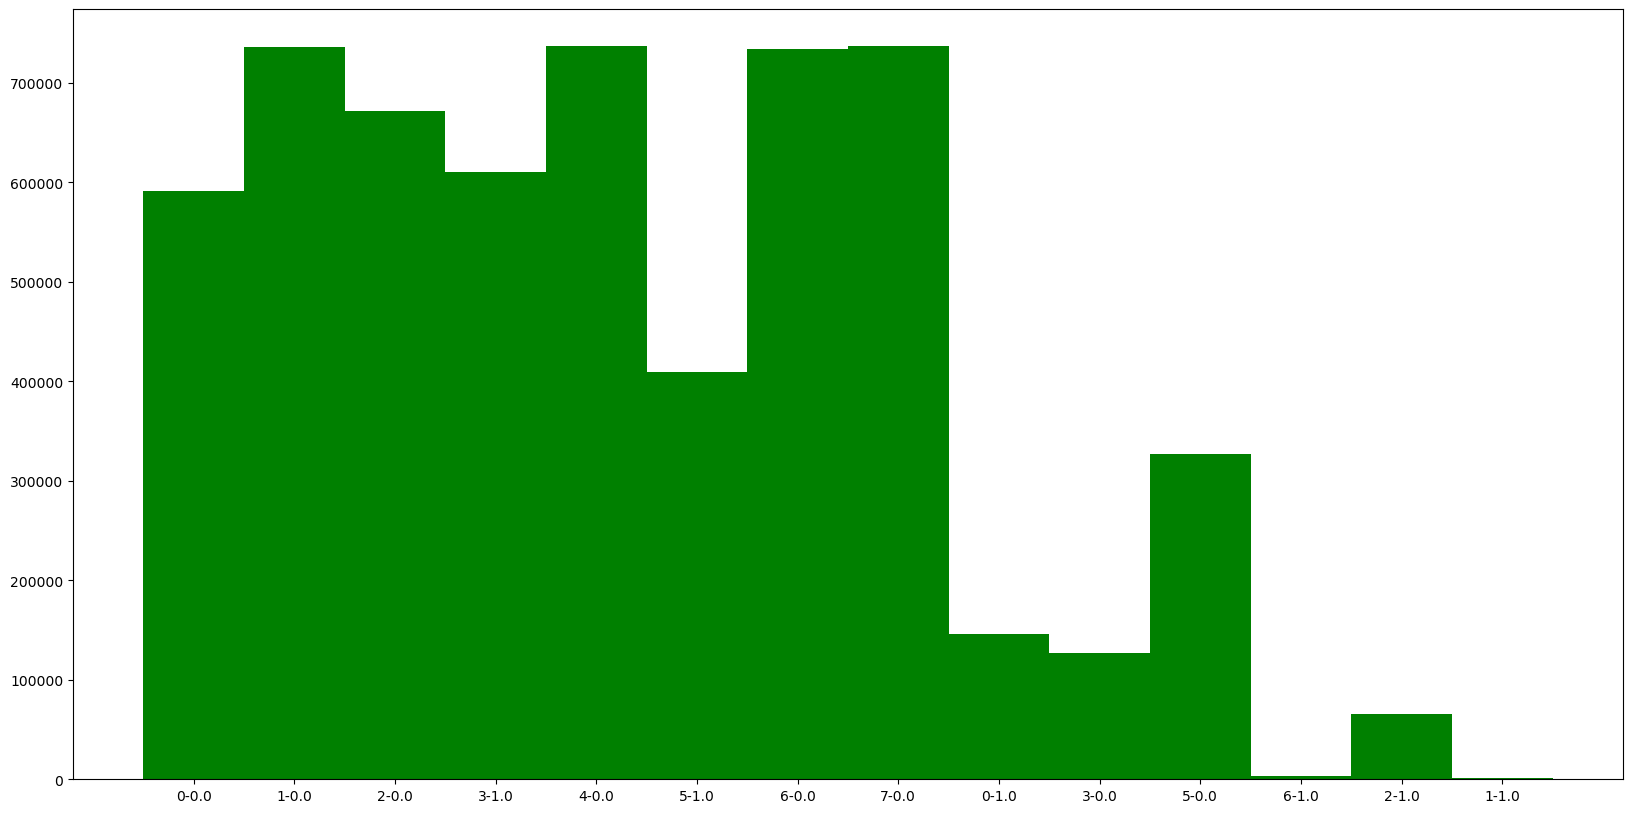

In [41]:
import pathlib
import torch
import torchvision
import os
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # to display images
import sys
sys.path.append("../")

from helper_code.resnet_model import ResnetModel
from helper_code.mario_buttons_dataset import MarioEpisode,MarioButtonsDataset


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.manual_seed(17)


batch_size = 128
learning_rate = 1e-3
epochs = 7
    
group =3#3
use_color = False

preload=False


print(f"loading dataset preload:{preload}")

transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((256,256)),
        torchvision.transforms.ToTensor(),
        
        #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

#mario_epsode = MarioEpisode('../mario_dataset/Rafael_hwfrb471_e3_8-3_win/',group_frames=group,use_color=use_color,transform=transforms,preload=False)
mario_dataset = MarioButtonsDataset('C:\\Users\\lavi\Desktop\\deep_learning\\Mario_IDM_DL\\mario_dataset\\'
                                    ,group_frames=group,use_color=use_color,transform=transforms,preload=False)
def _extract_action(file_name):
        #print(pathlib.PurePath(file_name).name)
        action_number = pathlib.PurePath(file_name).name.split("_")[5][1:]
        action_tensor = torch.zeros(8)
        action_bin = str(bin(int(action_number)))[2:].zfill(8) #remove 0b in start
        #print(action_bin)
        for i in range(8):
            action_tensor[i] = int(action_bin[i])
        return action_tensor

def calc_acc():
    tot_frames = 0
    #mean action :tensor([0.2000, 0.0000, 0.0900, 0.8100, 0.0000, 0.5400, 0.0000, 0.0000])
    mean = torch.Tensor([0.2000, -1, 0.0900, 0.8100, -1, 0.5400, -1,-1])
    button_hist = {}
    guess = torch.round(mean)
    tot_correct = 0
    for ep in tqdm(os.listdir('../mario_dataset/')):
        if not os.path.isdir(os.path.join('../mario_dataset/',ep)):
            continue
        for frame in os.listdir(f'../mario_dataset/{ep}/'):
            tot_frames += 1 
            action = _extract_action(frame)
            tot_correct += (guess == action).sum().item()
            for i in range(8):
                if f"{i}-{action[i]}" not in button_hist:
                    button_hist[f"{i}-{action[i]}"] = 0
                button_hist[f"{i}-{action[i]}"] += 1

    print(f"accuracy:{tot_correct/(tot_frames*4)}")
    print(button_hist)
    plt.figure(figsize=(20,10))
    plt.bar(button_hist.keys(), button_hist.values(), 1.0, color='g')
    plt.show()

def calc_word_level_hist():
    word_hist = {}
    for ep in tqdm(os.listdir('../mario_dataset/')):
        if not os.path.isdir(os.path.join('../mario_dataset/',ep)):
            continue
        for frame in os.listdir(f'../mario_dataset/{ep}/'):
            metadata = pathlib.PurePath(frame).name.split("_")
            world = metadata[3].split("-")[0]
            level = metadata[3].split("-")[1]
            if f"{world}-{level}" not in word_hist:
                word_hist[f"{world}-{level}"] = 0
            word_hist[f"{world}-{level}"] += 1
    print(word_hist)
    plt.figure(figsize=(20,10))
    plt.bar(word_hist.keys(), word_hist.values(), 1.0, color='g')
    plt.show()

calc_acc()
# tot_action = torch.zeros(8,dtype=torch.float32)
# for ep in tqdm(os.listdir('../mario_dataset/')):
#     if not os.path.isdir(os.path.join('../mario_dataset/',ep)):
#          continue
#     for frame in os.listdir(f'../mario_dataset/{ep}/'):
#         tot_frames += 1
#         tot_action += _extract_action(frame)
        
# tot_action = torch.round(tot_action/tot_frames,decimals=2)
# print(f"mean action :{tot_action}")


# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)
# model = ResnetModel(group_size=group,use_color=use_color,use_pretrained=False).to(device)
# model.load_state_dict(torch.load('C:\\Users\\lavi\Desktop\\deep_learning\\Mario_IDM_DL\\models\\checkpoint_1_2500.pt',map_location=device))

# model.eval()
# with torch.no_grad():
#     for i in [0,10,100,1000]:
#         img,action = mario_dataset[0]
#         img = img.unsqueeze(0)
#         img = img.to(device)
#         pred = torch.sigmoid(model(img))
#         print(f"pred:{pred.cpu().numpy()},action:{action}")

In [32]:
word_hist = {}
for ep in tqdm(os.listdir('../mario_dataset/')):
    if not os.path.isdir(os.path.join('../mario_dataset/',ep)):
        continue
    for frame in os.listdir(f'../mario_dataset/{ep}/'):
        metadata = pathlib.PurePath(frame).name.split("_")
        world = metadata[3].split("-")[0]
        level = 0
        if f"{world}-{level}" not in word_hist:
            word_hist[f"{world}-{level}"] = 0
        word_hist[f"{world}-{level}"] += 1
print(word_hist)
#plt.figure(figsize=(20,10))
#plt.bar(word_hist.keys(), word_hist.values(), 1.0, color='g')
#plt.show()

100%|██████████| 281/281 [00:15<00:00, 18.57it/s]

{'8-0': 391842, '1-0': 41152, '2-0': 51153, '3-0': 35025, '4-0': 41861, '5-0': 49159, '6-0': 60412, '7-0': 66530}
